In [1]:
import numpy as np
import pandas as pd
import nltk
from tqdm import tqdm
import string

## Data Loading

In [2]:
data = pd.read_csv("../datasets/kp_films.csv")
print(f"Dataframe shape: {data.shape}")
data.head()

Dataframe shape: (18641, 4)


,kp_id,rating_kp,genres,description
0,12819,7.70,['триллер' 'мелодрама' 'криминал'],"Миллиардер Томас Краун, пресыщенный финансист,..."
1,1260096,-1.00,['семейный' 'для' 'кино' 'ребенок'],Банда саранчи во главе с безжалостным Боссом о...
2,894673,4.40,['вестерн' 'иностранный' 'триллер' 'мистика' '...,"В горах живёт обособленная община, возглавляем..."
3,485364,6.06,['семейный' 'для' 'кино' 'короткометражный' 'р...,"Фильм высмеивает тех, кто понимает трудовую ди..."
4,1289632,6.40,['семейный' 'приключение' 'кино'],"В скучном городке Линдсборо всё меняется, когд..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18641 entries, 0 to 18640
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   kp_id        18499 non-null  object 
 1   rating_kp    18641 non-null  float64
 2   genres       18641 non-null  object 
 3   description  18641 non-null  object 
dtypes: float64(1), object(3)
memory usage: 582.7+ KB


In [4]:
data['description'] = data['description'].astype('str')

## Preprocessing

### Check empty values

In [5]:
data.drop(data[data['rating_kp']==-1.0].index, inplace=True)
print("Descriptions without rating: ", data[data['rating_kp']==-1.0].count())
data.head()

Descriptions without rating:  kp_id          0
rating_kp      0
genres         0
description    0
dtype: int64


,kp_id,rating_kp,genres,description
0,12819,7.70,['триллер' 'мелодрама' 'криминал'],"Миллиардер Томас Краун, пресыщенный финансист,..."
2,894673,4.40,['вестерн' 'иностранный' 'триллер' 'мистика' '...,"В горах живёт обособленная община, возглавляем..."
3,485364,6.06,['семейный' 'для' 'кино' 'короткометражный' 'р...,"Фильм высмеивает тех, кто понимает трудовую ди..."
4,1289632,6.40,['семейный' 'приключение' 'кино'],"В скучном городке Линдсборо всё меняется, когд..."
5,960385,6.30,['комедия'],С самого начала отношений страстные любовники ...


### to lower case

In [6]:
data["description"] = data["description"].str.lower()

### remove punctuation

In [7]:
symbols_to_remove = string.punctuation

def remove_punctuation(desc):
    return desc.translate(str.maketrans('', '', symbols_to_remove))

data["description"] = data["description"].apply(lambda desc: remove_punctuation(desc))
data.head()

,kp_id,rating_kp,genres,description
0,12819,7.70,['триллер' 'мелодрама' 'криминал'],миллиардер томас краун пресыщенный финансист п...
2,894673,4.40,['вестерн' 'иностранный' 'триллер' 'мистика' '...,в горах живёт обособленная община возглавляема...
3,485364,6.06,['семейный' 'для' 'кино' 'короткометражный' 'р...,фильм высмеивает тех кто понимает трудовую дис...
4,1289632,6.40,['семейный' 'приключение' 'кино'],в скучном городке линдсборо всё меняется когда...
5,960385,6.30,['комедия'],с самого начала отношений страстные любовники ...


### remove stop words

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kbduvakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = ", ".join(nltk.corpus.stopwords.words("russian"))
stop_words

'и, в, во, не, что, он, на, я, с, со, как, а, то, все, она, так, его, но, да, ты, к, у, же, вы, за, бы, по, только, ее, мне, было, вот, от, меня, еще, нет, о, из, ему, теперь, когда, даже, ну, вдруг, ли, если, уже, или, ни, быть, был, него, до, вас, нибудь, опять, уж, вам, ведь, там, потом, себя, ничего, ей, может, они, тут, где, есть, надо, ней, для, мы, тебя, их, чем, была, сам, чтоб, без, будто, чего, раз, тоже, себе, под, будет, ж, тогда, кто, этот, того, потому, этого, какой, совсем, ним, здесь, этом, один, почти, мой, тем, чтобы, нее, сейчас, были, куда, зачем, всех, никогда, можно, при, наконец, два, об, другой, хоть, после, над, больше, тот, через, эти, нас, про, всего, них, какая, много, разве, три, эту, моя, впрочем, хорошо, свою, этой, перед, иногда, лучше, чуть, том, нельзя, такой, им, более, всегда, конечно, всю, между'

In [10]:
stop_words = set(nltk.corpus.stopwords.words("russian"))

def remove_stopwords(desc):
    return " ".join([word for word in str(desc).split() if word not in stop_words])

data["description"] = data["description"].apply(lambda desc: remove_stopwords(desc))
data.head()

,kp_id,rating_kp,genres,description
0,12819,7.70,['триллер' 'мелодрама' 'криминал'],миллиардер томас краун пресыщенный финансист п...
2,894673,4.40,['вестерн' 'иностранный' 'триллер' 'мистика' '...,горах живёт обособленная община возглавляемая ...
3,485364,6.06,['семейный' 'для' 'кино' 'короткометражный' 'р...,фильм высмеивает тех понимает трудовую дисципл...
4,1289632,6.40,['семейный' 'приключение' 'кино'],скучном городке линдсборо всё меняется туда пр...
5,960385,6.30,['комедия'],самого начала отношений страстные любовники то...


### remove most frequent words

In [11]:
from collections import Counter
cnt = Counter()
for desc in data["description"].values:
    for word in desc.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('–', 8689),
 ('онлайн', 4906),
 ('—', 3920),
 ('фильм', 3882),
 ('это', 3790),
 ('который', 3672),
 ('жизнь', 3353),
 ('жизни', 3179),
 ('нашем', 3145),
 ('посмотреть', 2828)]

In [12]:
freq_words = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(desc):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(desc).split() if word not in freq_words])

data["description"] = data["description"].apply(lambda desc: remove_freqwords(desc))
data.head()

,kp_id,rating_kp,genres,description
0,12819,7.70,['триллер' 'мелодрама' 'криминал'],миллиардер томас краун пресыщенный финансист п...
2,894673,4.40,['вестерн' 'иностранный' 'триллер' 'мистика' '...,горах живёт обособленная община возглавляемая ...
3,485364,6.06,['семейный' 'для' 'кино' 'короткометражный' 'р...,высмеивает тех понимает трудовую дисциплину фо...
4,1289632,6.40,['семейный' 'приключение' 'кино'],скучном городке линдсборо всё меняется туда пр...
5,960385,6.30,['комедия'],самого начала отношений страстные любовники то...


### Stemming

In [13]:
from pymystem3 import Mystem

In [14]:
stemmer = Mystem()

def stem_words(desc):
    return "".join(stemmer.lemmatize(desc))[:-1]

data["description"] = data["description"].apply(lambda desc: stem_words(desc))
data.head()

,kp_id,rating_kp,genres,description
0,12819,7.70,['триллер' 'мелодрама' 'криминал'],миллиардер томас краун пресыщенный финансист п...
2,894673,4.40,['вестерн' 'иностранный' 'триллер' 'мистика' '...,гора жить обособленный община возглавлять мужч...
3,485364,6.06,['семейный' 'для' 'кино' 'короткометражный' 'р...,высмеивать тот понимать трудовой дисциплина фо...
4,1289632,6.40,['семейный' 'приключение' 'кино'],скучный городок линдсборо все меняться туда пр...
5,960385,6.30,['комедия'],самый начало отношение страстный любовник тону...


In [15]:
data.loc[0]["description"]

'миллиардер томас краун пресыщенный финансист похищать крупный музей картина моне стоимость 100 млн доллар кэтрин бэннинг следователь страховой компания должный поймать'

### Genres preprocessing

In [16]:
import string
symbols_to_remove = string.punctuation

def remove_punctuation(genres):
    return genres.translate(str.maketrans('', '', symbols_to_remove))

data["genres"] = data["genres"].apply(lambda genres: remove_punctuation(genres))
data.head()

,kp_id,rating_kp,genres,description
0,12819,7.70,триллер мелодрама криминал,миллиардер томас краун пресыщенный финансист п...
2,894673,4.40,вестерн иностранный триллер мистика фэнтези за...,гора жить обособленный община возглавлять мужч...
3,485364,6.06,семейный для кино короткометражный ребенок,высмеивать тот понимать трудовой дисциплина фо...
4,1289632,6.40,семейный приключение кино,скучный городок линдсборо все меняться туда пр...
5,960385,6.30,комедия,самый начало отношение страстный любовник тону...


In [17]:
unique_genres = set()
for genres in data.genres:
    for genre in genres.split():
        unique_genres.add(genre)
unique_genres, len(unique_genres)

({'анимация',
  'аниме',
  'артхаус',
  'биография',
  'боевик',
  'вестерн',
  'взрослый',
  'военный',
  'вокруг',
  'все',
  'детектив',
  'детективный',
  'детский',
  'для',
  'документальный',
  'дорам',
  'драма',
  'животное',
  'западный',
  'зарубежный',
  'знать',
  'иностранный',
  'интервью',
  'исторический',
  'катастрофа',
  'кино',
  'классика',
  'комедия',
  'комикс',
  'короткометражный',
  'криминал',
  'кулинария',
  'маленький',
  'медицинский',
  'мелодрама',
  'мировой',
  'мистика',
  'молодежный',
  'музыка',
  'музыкальный',
  'мультсериал',
  'мультфильм',
  'мюзикл',
  'научно',
  'научпоп',
  'немой',
  'нуар',
  'передача',
  'песня',
  'по',
  'познавательный',
  'полнометражный',
  'популярный',
  'приключение',
  'про',
  'развивать',
  'развитие',
  'развлекательный',
  'развлечение',
  'реалити',
  'ребенок',
  'рекомендовать',
  'романс',
  'романтика',
  'русский',
  'самый',
  'свет',
  'семейный',
  'сериал',
  'сказка',
  'советский',
  'спекта

In [18]:
import nltk
stop_words = set(nltk.corpus.stopwords.words("russian"))

result_genres = set()
for genre in unique_genres:
    if not genre in stop_words:
        result_genres.add(genre)
result_genres, len(result_genres)

({'анимация',
  'аниме',
  'артхаус',
  'биография',
  'боевик',
  'вестерн',
  'взрослый',
  'военный',
  'вокруг',
  'детектив',
  'детективный',
  'детский',
  'документальный',
  'дорам',
  'драма',
  'животное',
  'западный',
  'зарубежный',
  'знать',
  'иностранный',
  'интервью',
  'исторический',
  'катастрофа',
  'кино',
  'классика',
  'комедия',
  'комикс',
  'короткометражный',
  'криминал',
  'кулинария',
  'маленький',
  'медицинский',
  'мелодрама',
  'мировой',
  'мистика',
  'молодежный',
  'музыка',
  'музыкальный',
  'мультсериал',
  'мультфильм',
  'мюзикл',
  'научно',
  'научпоп',
  'немой',
  'нуар',
  'передача',
  'песня',
  'познавательный',
  'полнометражный',
  'популярный',
  'приключение',
  'развивать',
  'развитие',
  'развлекательный',
  'развлечение',
  'реалити',
  'ребенок',
  'рекомендовать',
  'романс',
  'романтика',
  'русский',
  'самый',
  'свет',
  'семейный',
  'сериал',
  'сказка',
  'советский',
  'спектакль',
  'спорт',
  'ссср',
  'тв',


In [19]:
bad_genres = [
    "вокруг", "самый", "свет", "рекомендовать",
    "хотеть", "советский", "развивать", "увлечение",
    "знать", 
]

for genre in bad_genres:
    result_genres.remove(genre)
len(result_genres)

75

### Choose top genres

In [20]:
threshold = 2000
genres_count = {}
for genre in result_genres:
    genres_count[genre] = data.genres.str.contains(genre).sum()
res_genres = set()
for genre in result_genres:
    if genres_count[genre] > threshold:
        res_genres.add(genre)
res_genres

{'драма',
 'зарубежный',
 'иностранный',
 'комедия',
 'мелодрама',
 'мультфильм',
 'русский',
 'триллер',
 'фильм'}

In [21]:
for genre in res_genres:
    data[genre] = data.genres.str.contains(genre)
data.head(5)

,kp_id,rating_kp,genres,description,иностранный,драма,комедия,мультфильм,зарубежный,триллер,мелодрама,русский,фильм
0,12819,7.70,триллер мелодрама криминал,миллиардер томас краун пресыщенный финансист п...,False,True,False,False,False,True,True,False,False
2,894673,4.40,вестерн иностранный триллер мистика фэнтези за...,гора жить обособленный община возглавлять мужч...,True,False,False,False,True,True,False,False,False
3,485364,6.06,семейный для кино короткометражный ребенок,высмеивать тот понимать трудовой дисциплина фо...,False,False,False,False,False,False,False,False,False
4,1289632,6.40,семейный приключение кино,скучный городок линдсборо все меняться туда пр...,False,False,False,False,False,False,False,False,False
5,960385,6.30,комедия,самый начало отношение страстный любовник тону...,False,False,True,False,False,False,False,False,False


In [22]:
data = data[data[list(res_genres)].any(axis=1)]

In [23]:
data.shape

(13640, 13)

In [24]:
data.head()

,kp_id,rating_kp,genres,description,иностранный,драма,комедия,мультфильм,зарубежный,триллер,мелодрама,русский,фильм
0,12819,7.7,триллер мелодрама криминал,миллиардер томас краун пресыщенный финансист п...,False,True,False,False,False,True,True,False,False
2,894673,4.4,вестерн иностранный триллер мистика фэнтези за...,гора жить обособленный община возглавлять мужч...,True,False,False,False,True,True,False,False,False
5,960385,6.3,комедия,самый начало отношение страстный любовник тону...,False,False,True,False,False,False,False,False,False
6,43127,7.3,драма советский военный ссср,советский художественный рассказывать событие ...,False,True,False,False,False,False,False,False,False
7,331881,5.3,ссср советский комедия,привычный порядком надоедать менять чтото сила...,False,False,True,False,False,False,False,False,False


## Modeling

In [25]:
# метка = случайный из тех что True
labels = data[list(res_genres)].apply(
    lambda row: np.random.choice(np.where(row.to_numpy() == True)[0]), 
    axis=1
)

In [26]:
data["label"] = labels

In [27]:
data.head()

,kp_id,rating_kp,genres,description,иностранный,драма,комедия,мультфильм,зарубежный,триллер,мелодрама,русский,фильм,label
0,12819,7.7,триллер мелодрама криминал,миллиардер томас краун пресыщенный финансист п...,False,True,False,False,False,True,True,False,False,6
2,894673,4.4,вестерн иностранный триллер мистика фэнтези за...,гора жить обособленный община возглавлять мужч...,True,False,False,False,True,True,False,False,False,5
5,960385,6.3,комедия,самый начало отношение страстный любовник тону...,False,False,True,False,False,False,False,False,False,2
6,43127,7.3,драма советский военный ссср,советский художественный рассказывать событие ...,False,True,False,False,False,False,False,False,False,1
7,331881,5.3,ссср советский комедия,привычный порядком надоедать менять чтото сила...,False,False,True,False,False,False,False,False,False,2


In [28]:
data_grouped_cnt = data.groupby(['label'])['label'].count()
data_grouped_cnt

label
0     778
1    4312
2    2262
3     590
4    1051
5    1437
6    1150
7    1278
8     782
Name: label, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data['description'], data['label'],
    test_size=0.3,
    stratify=data['label'],
    random_state=42,    
)
print(f"Train data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Train data size: (9548,)
Test data size: (4092,)


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
import sys
sys.path.append('../')

In [35]:
from pydml.lmnn import LMNN

# PCA

In [136]:
tfidf = TfidfVectorizer()
vec_X = tfidf.fit_transform(data['description'].head(500))


In [137]:
vec_X.shape

(500, 8842)

In [138]:
from sklearn.decomposition import TruncatedSVD
clf = TruncatedSVD(n_components=10)

In [139]:
pca_X = clf.fit_transform(vec_X)

In [140]:
pca_X.shape

(500, 10)

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pca_X, data['label'].head(500).to_numpy(),
    test_size=0.3,
    stratify=data['label'].head(500).to_numpy(),
    random_state=42,    
)
print(f"Train data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Train data size: (350, 10)
Test data size: (150, 10)


## Предсказание рейтинга:

In [153]:
def rating_cat(r):
    if r < 6.0:
        return 0
    elif 6.0 <= r < 7.5:
        return 1
    elif 7.5 <= r < 0.9:
        return 2
    else:
        return 3

data["label"] = data["rating_kp"].apply(lambda r: rating_cat(r))
data.head()

,kp_id,rating_kp,genres,description,иностранный,драма,комедия,мультфильм,зарубежный,триллер,мелодрама,русский,фильм,label
0,12819,7.7,триллер мелодрама криминал,миллиардер томас краун пресыщенный финансист п...,False,True,False,False,False,True,True,False,False,3
2,894673,4.4,вестерн иностранный триллер мистика фэнтези за...,гора жить обособленный община возглавлять мужч...,True,False,False,False,True,True,False,False,False,0
5,960385,6.3,комедия,самый начало отношение страстный любовник тону...,False,False,True,False,False,False,False,False,False,1
6,43127,7.3,драма советский военный ссср,советский художественный рассказывать событие ...,False,True,False,False,False,False,False,False,False,1
7,331881,5.3,ссср советский комедия,привычный порядком надоедать менять чтото сила...,False,False,True,False,False,False,False,False,False,0


In [154]:
tfidf = TfidfVectorizer()
vec_X = tfidf.fit_transform(data['description'].head(500))

In [155]:
from sklearn.decomposition import TruncatedSVD
clf = TruncatedSVD(n_components=10)

In [156]:
pca_X = clf.fit_transform(vec_X)

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pca_X, data['label'].head(500).to_numpy(),
    test_size=0.3,
    stratify=data['label'].head(500).to_numpy(),
    random_state=42,    
)
print(f"Train data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Train data size: (350, 10)
Test data size: (150, 10)


In [158]:
accs_train_knn = []
accs_test_knn = []
for k in range(1, 100):
    knn_pipeline = Pipeline(steps=[
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    knn_pipeline.fit(X_train, y_train)

    knn_preds_train = knn_pipeline.predict(X_train)
    knn_preds_test = knn_pipeline.predict(X_test)

    curr_acc_train = accuracy_score(y_train, knn_preds_train)
    curr_acc_test = accuracy_score(y_test, knn_preds_test)
    accs_train_knn.append(curr_acc_train)
    accs_test_knn.append(curr_acc_test)

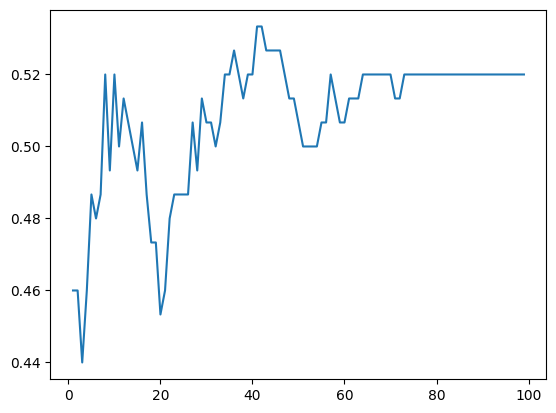

In [159]:
plt.plot(range(1, 100), accs_test_knn)

In [161]:
knn_pipeline = Pipeline(steps=[
    ('knn', KNeighborsClassifier(n_neighbors=40))
])
knn_pipeline.fit(X_train, y_train)

knn_preds_train = knn_pipeline.predict(X_train)
knn_preds_test = knn_pipeline.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, knn_preds_test)
f1_micro = f1_score(y_test, knn_preds_test, average="micro")
f1_macro = f1_score(y_test, knn_preds_test, average="macro")
print("KNN results")
print(f"accuracy = {accuracy}\n f1_micro = {f1_micro}\n f1_macro = {f1_macro}")

KNN results
accuracy = 0.52
 f1_micro = 0.52
 f1_macro = 0.2513477088948787


In [173]:
lmnn_pipeline = Pipeline(steps=[
    ('knn', LMNN(k=4, solver="SDP"))
])
lmnn_pipeline.fit(X_train, y_train)

lmnn_preds_train = lmnn_pipeline.predict(X_train)
lmnn_preds_test = lmnn_pipeline.predict(X_test)

In [174]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, lmnn_preds_test)
f1_micro = f1_score(y_test, lmnn_preds_test, average="micro")
f1_macro = f1_score(y_test, lmnn_preds_test, average="macro")
print("KNN results")
print(f"accuracy = {accuracy}\n f1_micro = {f1_micro}\n f1_macro = {f1_macro}")

KNN results
accuracy = 0.5133333333333333
 f1_micro = 0.5133333333333333
 f1_macro = 0.4223745363018945


In [171]:
accs_train = []
accs_test = []
for k in range(2, 20, 2):
    lmnn_pipeline = Pipeline(steps=[
        ('knn', LMNN(k=k, solver="SDP"))
    ])
    lmnn_pipeline.fit(X_train, y_train)
    lmnn_preds_train = lmnn_pipeline.predict(X_train)
    lmnn_preds_test = lmnn_pipeline.predict(X_test)
    curr_acc_train = accuracy_score(y_train, lmnn_preds_train)
    curr_acc_test = accuracy_score(y_test, lmnn_preds_test)
    accs_train.append(curr_acc_train)
    accs_test.append(curr_acc_test)

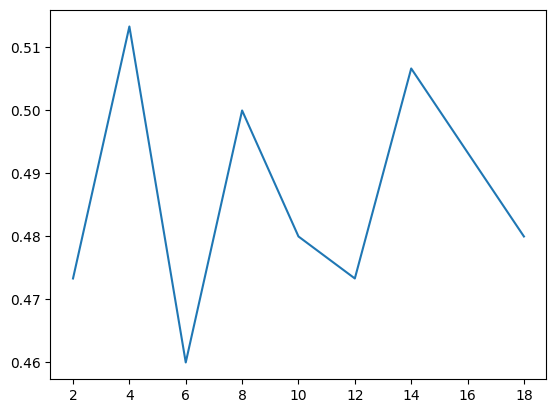

In [172]:
plt.plot(range(2, 20, 2), accs_test)